In [7]:
import numpy as np
import matplotlib as plt
import pandas
import seaborn as sns


df = pandas.read_csv("evaluation_results_old")
df = df[df['model_type'] == 'neural']
df = df.sample(frac=1)

df['dataset'] = df['dataset'].replace({'glove-100-angular-16-small': 'GloVe-16',
                                      'glove-100-angular-256-small': 'GloVe-256',
                                      'mnist-784-euclidean-16-small': 'MNIST-16',
                                      'mnist-784-euclidean-256-small': 'MNIST-256',
                                      'random-xs-20-euclidean-16-small': 'random-16',
                                      'random-xs-20-euclidean-256-small': 'random-256'})
df['m'] = df['dataset']
df['m'].replace(to_replace=r"([^\d]*)(\d*)", value=r"\2", regex=True, inplace=True)
df['m'] = df['m'].astype(int)
df['dataset'].replace(to_replace=r"([^\d]*)-(\d*)", value=r"\1", regex=True, inplace=True)

# df['dataset'] = df['dataset'].astype('category')
# df['model_type'] = df['model_type'].astype('category')
df['epochs'] = df['epochs'].astype(int)
df['layer_size'] = df['layer_size'].astype(int)
df['error'] = df['error'].astype(np.float64)
df['queries_per_second'] = df['queries_per_second'].astype(int)
df = df.sort_values(["dataset"])
df = df.rename(columns={'error': 'Mean error', 'queries_per_second': 'Throughput (queries/s)'})

# df = df[df['model_type'] == 'neural']
# df = df.sort_values(["dataset", "nblocks", "layer_size"])
# df = df[df['layer_size'] == 128][df['epochs']==50]
# df = df.groupby(['dataset', 'nblocks'], as_index=False).mean()
# df = df[df['dataset'] == 'glove-100-angular-256-small'].groupby(["epochs"], as_index=False).mean()

# df = df[df['model_type']=='neural']
# df[df['kl_mean']==min(df['kl_mean'])]
# df.groupby('dataset')
# df = df[df['epochs'] == 50]
# df = df[df['nblocks'] == 1]
# df = df[df['dataset'] == 'glove-100-angular-16-small']

# df_best = df.sort_values("error").groupby(["dataset"], as_index=False).first().copy()
# df[df['layer_size'] == 128]
df.head()

dataset model_type  epochs  layer_size  Mean error  \
1709148   GloVe     neural      50         128    0.690175   
902222    GloVe     neural      50         512    0.649902   
790536    GloVe     neural      50         256    0.736588   
442385    GloVe     neural      50          64    0.853265   
871030    GloVe     neural      50         256    0.668885   

         Throughput (queries/s)    m  
1709148                    5511   16  
902222                     7500  256  
790536                    10766  256  
442385                    13529  256  
871030                    10766  256

In [17]:
sns.set(font_scale=2)
# sns.relplot(x="layer_size", y="error", kind="line", hue="dataset", style="dataset", data=df)
# g=sns.barplot(x="dataset", y="queries_per_second", hue="layer_size", ci=None, data=df)
g=sns.catplot(x="epochs", y="Throughput (queries/s)", hue="layer_size", row="m", col="dataset", 
              ci=None, data=df, kind='bar', sharey=True, sharex=True)
g.set_xticklabels(rotation=30, ha='right')
# g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set(xlabel='')
g._legend.set_title("Layer size")

In [45]:
df = df[df['layer_size'] == 512]
df = df.sort_values("error").groupby(["dataset", "model_type"], as_index=False).first().copy()
df

dataset model_type  epochs  layer_size  nblocks  \
0        glove-100-angular-16-small     neural       5         512        2   
1       glove-100-angular-256-small     neural       3         512        1   
2      mnist-784-euclidean-16-small     neural      50         512        3   
3     mnist-784-euclidean-256-small     neural       1         512        1   
4   random-xs-20-euclidean-16-small     neural      10         512        1   
5  random-xs-20-euclidean-256-small     neural       3         512        4   

      error     stdev  queries_per_second  
0  0.605052  0.200599                 120  
1  0.722971  0.096542                 171  
2  0.302722  0.228316                  62  
3  0.433642  0.130291                 525  
4  0.254618  0.217058                  43  
5  0.348172  0.155988                 161

In [5]:

def plot_line(color, df):
    if color not in ["bblue", "rred", "ggreen", "ppurple"]:
        raise ValueError(f"Unknown color spec (check latex colors): {color}")
    coordinates = "\n\tcoordinates {"
    for i, row in df.iterrows():
        dsname = row["dataset"]
        kl_mean = row["kl_mean"]
        coordinates += f"({dsname}, {kl_mean})"
    coordinates += "}"
    
    addplot_line = f"\\addplot[style={{{color},fill={color},mark=none}}]"

    print(addplot_line + coordinates + ";")
    
plot_line("bblue", df)

\addplot[style={bblue,fill=bblue,mark=none}]
	coordinates {(mnist-784-euclidean-16-small, 2.406206893375277)(mnist-784-euclidean-16-small, 0.4301153208975739)(mnist-784-euclidean-256-small, 4.026282350646515)(mnist-784-euclidean-256-small, 0.5212018089428284)(random-xs-20-euclidean-16-small, 2.6166756443333363)(random-xs-20-euclidean-16-small, 0.3351056627695455)(random-xs-20-euclidean-256-small, 4.313012832340371)(random-xs-20-euclidean-256-small, 0.43809084298010376)};


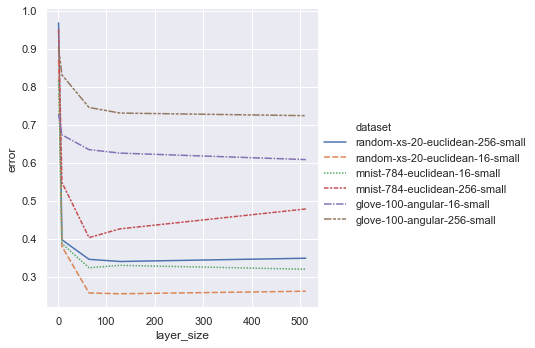

In [87]:
import seaborn as sns
sns.set()
ds = pandas.read_csv("evaluation_results")
ds = ds[ds['nblocks'] == 1]
ds = ds[ds['epochs'] == 50]
sns.relplot(x="layer_size", y="error", kind="line", hue="dataset", style="dataset", data=ds)